# The Numpy Library

**Burton Rosenberg, May 2017**

Python is being used increasingly as a language for scientific computing because of its qualities as a programing language and because of community developed libraries extending the langauges abilities. Some of these libraries are written in C to truely extend the way the language represents and manipulates data.

Numby introduces the datatype _ndarray_, a multi-dimensional array of numbers. The ndarray improves on the list for efficiency and the collection methods it supports. That includes the notion of _universal functions_ and _broadcasting_. These concepts and methods make it very intuitive to us arrays for scientific computation. 

Numpy is one element of a larger library for Pythonic scientific computing called Scipy. The entire scipy library is described at [scipy.org](https://www.scipy.org/docs.html). One might also look at the [scipy-lectures](http://www.scipy-lectures.org/index.html) tutoral.

## Libraries

Libraries in Python include packages and modules. Modules are files containing Python code that is made available for use with the _import statement_. Packages are collections of modules, represented as entire directory trees of modules. An import statement is of the form  import-as or from-import-as.

Import statements must first find the module in the system enviornment, then make the contents available by populating the local namespace. A simple _import module_ command finds a file with the same name as the module name and populates a local namespace of the same name as the module name. If one wishes the local namespace name to be different, use _import module as name-. 

Here we import the numpy library.

In [198]:
import numpy as np

The from form of the import statement, _from module import name as name_, operates by first looking up the module, then introducing namespaces one by one, according to the trailing name-as clauses.

#### Search path

Names are found by searching the system path. This path can be accessed using the path list of strings in the sys module.


In [3]:
#import sys
import sys
print "type(sys):", type(sys)
print "type(sys.path)", type(sys.path)
print "type(sys.path[0]):", type(sys.path[0])
print
print "sys.path:", sys.path



type(sys): <type 'module'>
type(sys.path) <type 'list'>
type(sys.path[0]): <type 'str'>

sys.path: ['', '/home/graph/burt/anaconda2/lib/python27.zip', '/home/graph/burt/anaconda2/lib/python2.7', '/home/graph/burt/anaconda2/lib/python2.7/plat-linux2', '/home/graph/burt/anaconda2/lib/python2.7/lib-tk', '/home/graph/burt/anaconda2/lib/python2.7/lib-old', '/home/graph/burt/anaconda2/lib/python2.7/lib-dynload', '/home/graph/burt/anaconda2/lib/python2.7/site-packages', '/home/graph/burt/anaconda2/lib/python2.7/site-packages/Sphinx-1.5.1-py2.7.egg', '/home/graph/burt/anaconda2/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '/home/graph/burt/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/srv/home/graph/burt/.ipython']


#### Packages

_Packages_ are directory-like spaces of modules. Imports of packages retain the directory hierarchy by dot-delimited names in the python namespace. For instance, the _from matplotlib import pyplot as plt_ command brings in matplotlib.pyplot, but binds it to the simple name plt.

## Numpy arrays

The ndarray type provided by the numby library is an efficient and flexible array for scientific computing. It contains only numbers or other arrays in a rectangular fashion. An ndarray is represented in memory as a block of memory, an indexing function (the array's shape) and an base type (some sort of number). The indexing function gives the number of dimensions, the size along each dimension, and a _stride_ indicating offsets between successive elements in a dimension. 

In [4]:
import numpy as np
import inspect

na  = np.array([1,2,3],dtype="float")
nb= np.zeros(3)
nc = np.ones((3,2))
print "na:",na
print "nb:", nb
print "nc:", nc
                
for i,t in enumerate(inspect.getmro(type(na))):
    print i,t

# advanced

nia = np.eye(3)
nib = np.diag(np.ones(3))
print "We hold these truths to be self-evident:", np.array_equal(nia,nib)

na: [ 1.  2.  3.]
nb: [ 0.  0.  0.]
nc: [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
0 <type 'numpy.ndarray'>
1 <type 'object'>
We hold these truths to be self-evident: True


#### element-wise operations, masking-indexing and array functions

Numby arrays support:
* element-wise operations such as addition, multiplication and logical operations; 
* indexing operations based on masking;
* some common functions involving arrays

See the scipy.org numpy-1.12.0 [reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.html)

In [7]:
import numpy as np

a = np.ones(5)
c = np.array([1,2,3,4,5])
print "We hold these truths to be self-evident:", c.sum()/len(c)==c.mean()
print "The big ones:", c[c > (a+a)]
print "We hold these truths to be self-evident:", c.dot(a) == np.sum(a[:]*c[:])
print "We hold these truths to be self-evident:", np.linalg.norm(c)**2 == np.inner(c,c)

# note that dot extends to matrix multiplication, but inner 
# dereduces an array by one dimension, by distributing the inner product
# over the last dimension

a = np.arange(12).reshape((3,4))
print "The shape of a:", a.shape
print "The rows of a:"

for i,r in enumerate(a):
    print '\t',i,r
print "A vector in inner products:", np.inner(a,np.arange(4))
print "We hold these truths to be self-evident:", np.array_equal(
        np.dot(a,np.arange(4)),
        np.inner(a,np.arange(4)))


We hold these truths to be self-evident: True
The big ones: [3 4 5]
We hold these truths to be self-evident: True
We hold these truths to be self-evident: True
The shape of a: (3, 4)
The rows of a:
	0 [0 1 2 3]
	1 [4 5 6 7]
	2 [ 8  9 10 11]
A vector in inner products: [14 38 62]
We hold these truths to be self-evident: True


#### Broadcasting

When the shape of two arrays are broadcast-compatible, the can be extended by broadcasting to distribute multiple copies of one array over the other. In simple terms this includes such operations as _2*c_ where c is an array, since 2 will be broadcast over each element in c (it can also be that _times_ is rewritten as a universal function).

Broadcast-compatible arrays are those whose shapes either agree on any dimension, or one dimension is 1, or they differ in dimensions, in which case the missing dimensions are considers 1's.



In [202]:
a = np.arange(12).reshape(3,4)
print "We hold these truths to be self-evident:", np.array_equal(
    # broadcast a 1x4 over a 3x4
    a+np.ones(4),
    # elementwise addition of two 3x4's
    a+np.ones(12).reshape(3,4))


We hold these truths to be self-evident: True


#### Ufuncs

Universal functions are distributed elementwise over each element in an array. This includes some operators, and other standard functions that have been elevated to become ufuncs.
    

In [206]:

# times-by-2 and add-1 are show broadcasting
# elementwise modulo and lessthan are ufunc'ed
c = np.array([1,2,3,4,5])
print "We hold these truths to be self-evident:", np.all(2*c%2==0)
print "Vector dominance ordering:", np.all(c<(c+1))


We hold these truths to be self-evident: True
Vector dominance ordering: True


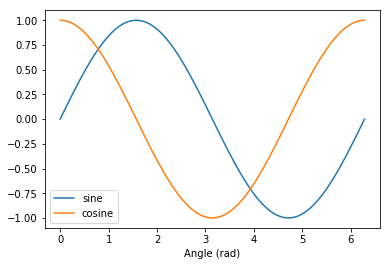

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)  # ndarray by a linear spacing within a range
s = np.sin(x) # universal function
c = np.cos(x)
plt.plot(x,s) # matlab-like plotting library
plt.plot(x,c)
plt.xlabel('Angle (rad)')
plt.legend(['sine','cosine'])
plt.show()